   TV_Ad_Spend  Social_Media_Ad_Spend  Radio_Ad_Spend      Sales
0   112.362036             128.406329       10.312387   7.801775
1   285.214292              16.827993       90.255291  14.840430
2   219.598183              32.325743       50.525237  12.065901
3   179.597545             179.710838       82.645747  14.637030
4    46.805592             121.285812       32.004960   6.003747


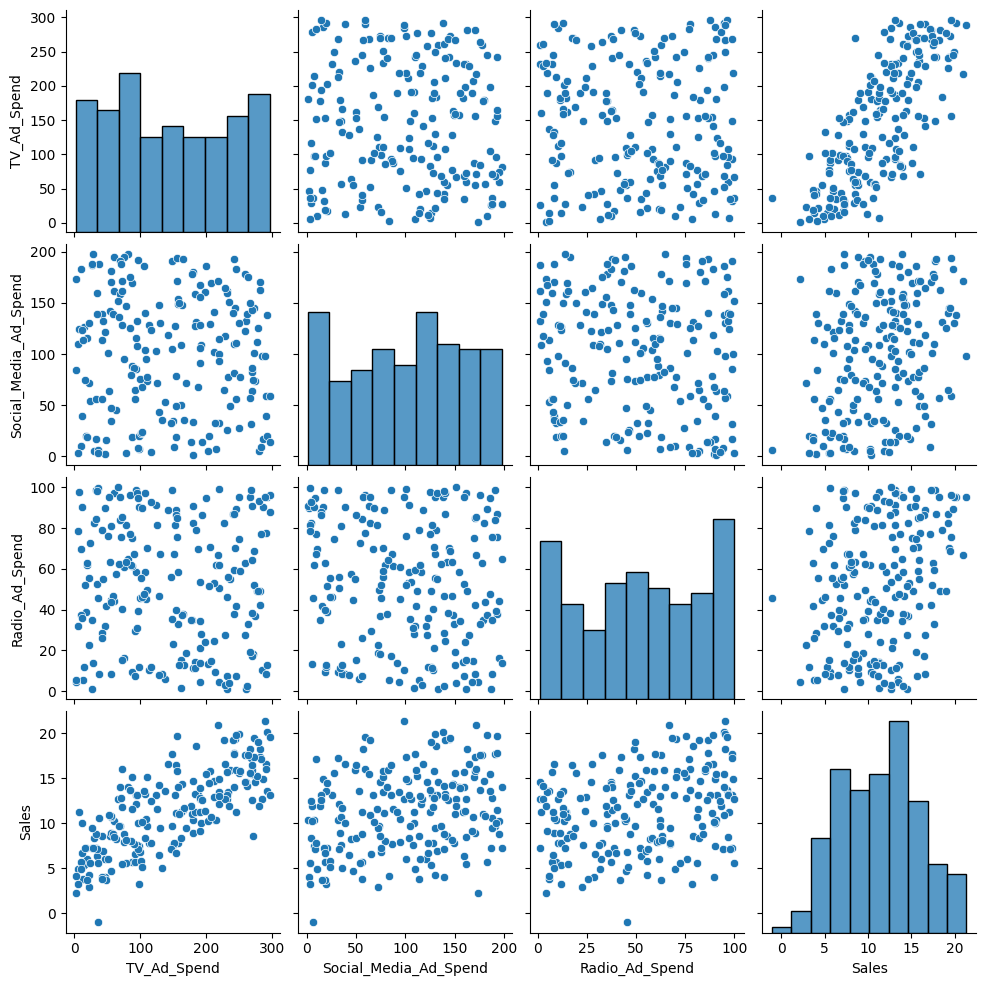


Model Performance:
Mean Absolute Error (MAE): 1.41
Root Mean Squared Error (RMSE): 1.66
R² Score: 0.87


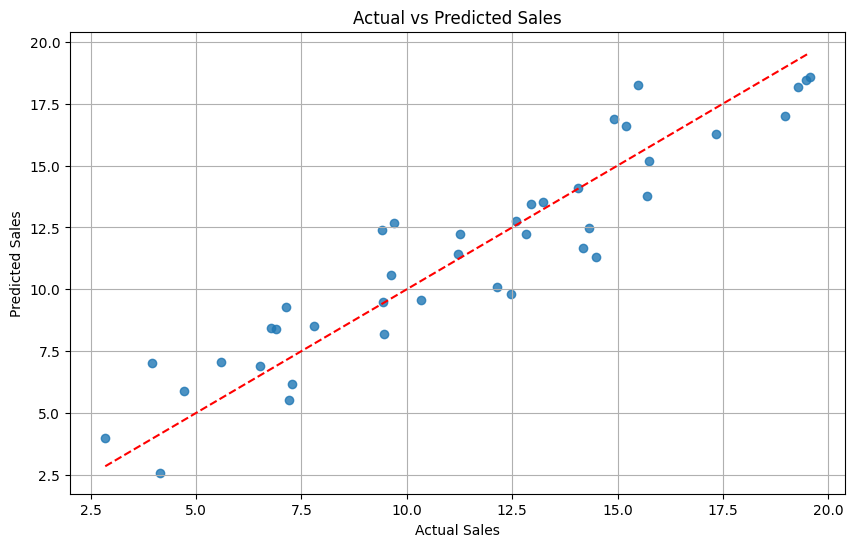

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Step 1: Generate synthetic sales data
np.random.seed(42)
n_samples = 200

# Simulate features
tv_ads = np.random.uniform(0, 300, n_samples)
social_media_ads = np.random.uniform(0, 200, n_samples)
radio_ads = np.random.uniform(0, 100, n_samples)

# Simulate sales with a known relation + noise
sales = (0.04 * tv_ads + 0.03 * social_media_ads + 0.05 * radio_ads + 
         np.random.normal(0, 2, n_samples))

# Create DataFrame
df = pd.DataFrame({
    'TV_Ad_Spend': tv_ads,
    'Social_Media_Ad_Spend': social_media_ads,
    'Radio_Ad_Spend': radio_ads,
    'Sales': sales
})

# Step 2: Exploratory Data Analysis
print(df.head())
sns.pairplot(df)
plt.show()

# Step 3: Feature Scaling (optional but useful for some models)
X = df.drop('Sales', axis=1)
y = df['Sales']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Step 8: Visualizing Predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.8)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.grid(True)
plt.show()
